In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('vertebrate.csv', header='infer')

In [3]:
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


In [4]:
data['Class']=data['Class'].replace(['fishes','birds','amphibians','reptiles'],'non-mammals')

In [5]:
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,non-mammals
2,salmon,0,0,1,0,0,0,non-mammals
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,non-mammals
5,komodo,0,0,0,0,1,0,non-mammals
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,non-mammals
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,non-mammals


In [6]:
pd.crosstab([data['Warm-blooded'],data['Gives Birth']],data['Class'])

Class                     mammals  non-mammals
Warm-blooded Gives Birth                      
0            0                  0            7
             1                  0            1
1            0                  0            2
             1                  5            0

In [7]:
# create decision tree
from sklearn import tree

In [8]:
y=data['Class']
y

0         mammals
1     non-mammals
2     non-mammals
3         mammals
4     non-mammals
5     non-mammals
6         mammals
7     non-mammals
8         mammals
9     non-mammals
10    non-mammals
11    non-mammals
12        mammals
13    non-mammals
14    non-mammals
Name: Class, dtype: object

In [9]:
# drop columns that dont form part of the features
x=data.drop(['Name','Class'],axis=1)
x

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,1,1,0,0,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,1,1,1,0,0,0
4,0,0,1,0,1,1
5,0,0,0,0,1,0
6,1,1,0,1,1,1
7,1,0,0,1,1,0
8,1,1,0,0,1,0
9,0,1,1,0,0,0


In [10]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [11]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [12]:
clf=clf.fit(x,y)

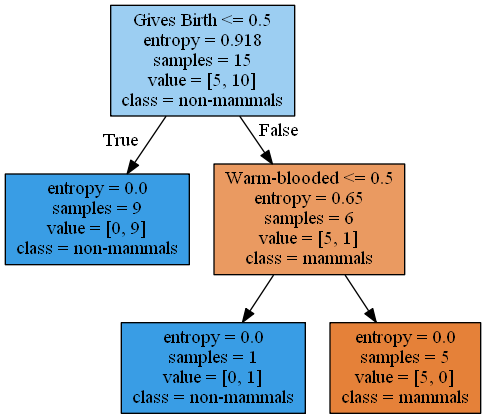

In [13]:
# draw the tree
import pydotplus
from IPython.display import Image

dot_data=tree.export_graphviz(clf,feature_names=x.columns,class_names=['mammals','non-mammals'],filled=True,out_file=None)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [14]:
# Next apply the decision tree in an example

In [17]:
data.columns

Index(['Name', 'Warm-blooded', 'Gives Birth', 'Aquatic Creature',
       'Aerial Creature', 'Has Legs', 'Hibernates', 'Class'],
      dtype='object')

In [25]:
testData=[['gila monster',0,0,0,0,1,1,'non-mammals'],['platypus',1,0,0,1,1,0,'mammals'],['owl',1,0,0,1,1,0,'non-mammals'],['dolphin',1,1,1,0,0,0,'mammals']]

In [28]:
testData=pd.DataFrame(testData,columns=data.columns)

In [29]:
#extract the predictor and target class

In [30]:
testY=testData['Class']

In [37]:
type(testY)

pandas.core.series.Series

In [38]:
testX=testData.drop(['Name','Class'],axis=1)
type(testX)

pandas.core.frame.DataFrame

In [39]:
predY=clf.predict(testX)
predY

array(['non-mammals', 'non-mammals', 'non-mammals', 'mammals'],
      dtype=object)

In [44]:
predictions=pd.concat([testData['Name'],pd.Series(predY,name='Predicted Class')],axis=1)
predictions

,Name,Predicted Class
0,gila monster,non-mammals
1,platypus,non-mammals
2,owl,non-mammals
3,dolphin,mammals


In [41]:
from sklearn.metrics import accuracy_score

In [45]:
print('accuracy on test data is %.2f'% accuracy_score(testY,predY))

accuracy on test data is 0.75


## Model Overfitting

### Create a dataset that has 2D 1500 labelled instances. the will be 0 and 1
- Normal Distribution for class 1 generated using 3 Gaussian distibution (6,14)(10,6)(14,14)
- 0 values will be genrated using uniform distribution of a square region
- Classes will be balances 1500/7 ie. 750 assigned to 0 and 750 assigned 1

In [80]:
# create the dataset
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random
%matplotlib inline

In [81]:
N=1500
mean1=[6,14]
mean2=[10,6]
mean3=[14,14]
cov=[3.5,0],[0,3.5] #co-variants

In [82]:
np.random.seed(50)

In [83]:
x=np.random.multivariate_normal(mean1,cov,int(N/6))

In [84]:
x.shape

(250, 2)

In [85]:
x[0]

array([ 3.0808485 , 13.94204621])

In [86]:
x=np.concatenate((x,np.random.multivariate_normal(mean2,cov,int(N/6))))
x

array([[ 3.0808485 , 13.94204621],
       [ 4.83834929, 11.2600208 ],
       [ 8.64150932, 13.10811583],
       [ 4.5398758 , 16.00228759],
       [ 3.60105022, 11.51651438],
       [ 6.23635608, 15.61301674],
       [ 7.3034755 , 13.37408585],
       [ 4.13379962, 16.99128351],
       [12.20006725, 15.84794932],
       [ 6.23173255, 15.38962423],
       [ 5.26297609, 14.27709932],
       [ 5.22877996, 13.69932965],
       [ 6.26103949, 14.53406429],
       [ 5.47380699, 17.2008145 ],
       [ 5.71981227, 15.29144562],
       [ 8.04894938, 16.50393341],
       [ 3.43886981, 14.91002276],
       [ 7.40970998, 14.67997999],
       [ 5.4112306 , 16.56917381],
       [ 4.83182245, 14.70297136],
       [ 5.62505541, 15.39009692],
       [ 7.60397735, 11.18217787],
       [ 2.88254055, 13.59029824],
       [ 5.32863735, 14.70816047],
       [ 7.28004974, 11.81514136],
       [ 4.51602759, 13.92734563],
       [11.06106866, 11.20986759],
       [ 6.17955827, 14.98159895],
       [ 7.52597042,

In [87]:
x=np.concatenate((x,np.random.multivariate_normal(mean3,cov,int(N/6))))

In [88]:
x=np.concatenate((x,20*np.random.rand(int(N/2),2)))

In [89]:
x.shape

(1500, 2)

In [90]:
y=np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))

In [91]:
y

array([1., 1., 1., ..., 0., 0., 0.])

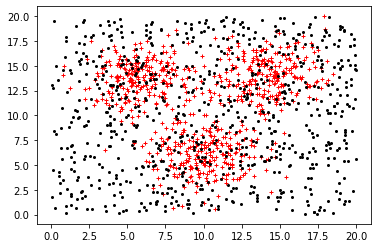

In [92]:
plt.plot(x[:int(N/2),0],x[:int(N/2),1],'r+',x[int(N/2):,0],x[int(N/2):,1],'k.',ms=4)

In [93]:
#  train using 80%  & 20% for testing
# vary the depth of the tree 2 to 50
# check the accuracies of the model

In [94]:
# Train & test the model

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [97]:
x_test.shape

(300, 2)

In [98]:
y_test.shape

(300,)

In [99]:
x_train

array([[ 9.05881395, 14.62151417],
       [14.8306329 , 11.72082915],
       [19.67459616, 13.67475883],
       ...,
       [ 6.45052624, 17.81211706],
       [ 6.54480589, 14.85793882],
       [ 3.01486535, 13.16257116]])

In [101]:
y_test

array([1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1.

In [102]:
# import libraries

In [103]:
from sklearn import tree

In [104]:
from sklearn.metrics import accuracy_score

In [105]:
# model fitting and evaluation

In [106]:
maxDepths=[2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

In [107]:
trainAcc=np.zeros(len(maxDepths))

In [108]:
trainAcc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [109]:
testAcc=np.zeros(len(maxDepths))
testAcc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [110]:
index=0

In [114]:
for depth in maxDepths:
    clf=tree.DecisionTreeClassifier(max_depth=depth)
    clf=clf.fit(x_train,y_train)
    y_predTrain=clf.predict(x_train)
    y_predTest=clf.predict(x_test)
    trainAcc[index]=accuracy_score(y_train,y_predTrain)
    testAcc[index]=accuracy_score(y_test,y_predTest)
    index+=1

In [115]:
trainAcc

array([0.65416667, 0.69583333, 0.73833333, 0.7475    , 0.77083333,
       0.79583333, 0.80416667, 0.82416667, 0.845     , 0.95166667,
       0.98916667, 0.99916667, 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [116]:
testAcc

array([0.61333333, 0.66333333, 0.68666667, 0.71      , 0.71333333,
       0.68666667, 0.69666667, 0.69666667, 0.68666667, 0.66666667,
       0.65333333, 0.66666667, 0.64333333, 0.65666667, 0.65666667,
       0.64333333, 0.65333333])

Text(0, 0.5, 'Accuracy')

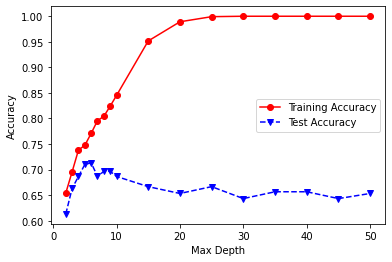

In [117]:
#plot the results
plt.plot(maxDepths,trainAcc,'ro-',maxDepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

In [118]:
# Q if you are  to put this model into production, which depth would you use?

# A when the test reaches max accuracy i.e at depth 6

In [119]:
max(trainAcc)

1.0

In [120]:
max(testAcc)

0.7133333333333334

In [ ]:
## Q
# search for a dataset that has categorical data from kaggle
# create a decision tree from the dataset
# deploy a model and show the ideal depth